In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
df.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN
5,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,15-24 years,3021.0,133459.0,3175.0,1257.0,206.0,5133.0,NaN
6,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,18-29 years,7030.0,231382.0,7038.0,3162.0,329.0,11206.0,NaN
7,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,25-34 years,12401.0,278680.0,11706.0,5842.0,464.0,18689.0,NaN
8,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,30-39 years,19886.0,348041.0,18395.0,9766.0,644.0,29114.0,NaN
9,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,35-44 years,30108.0,416477.0,27301.0,15228.0,797.0,42904.0,NaN


In [30]:
yearly_totals = df[(df['Group'] == 'By Year') & (df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023)]
yearly_totals

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
2754,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,All Ages,385666.0,3390039.0,352010.0,180086.0,8787.0,565226.0,NaN
2805,09/27/2023,01/01/2021,12/31/2021,By Year,2021.0,NaN,United States,All Sexes,All Ages,463263.0,3471767.0,412006.0,259613.0,1092.0,616475.0,NaN
2856,09/27/2023,01/01/2022,12/31/2022,By Year,2022.0,NaN,United States,All Sexes,All Ages,246161.0,3288942.0,267652.0,110393.0,8751.0,411412.0,NaN


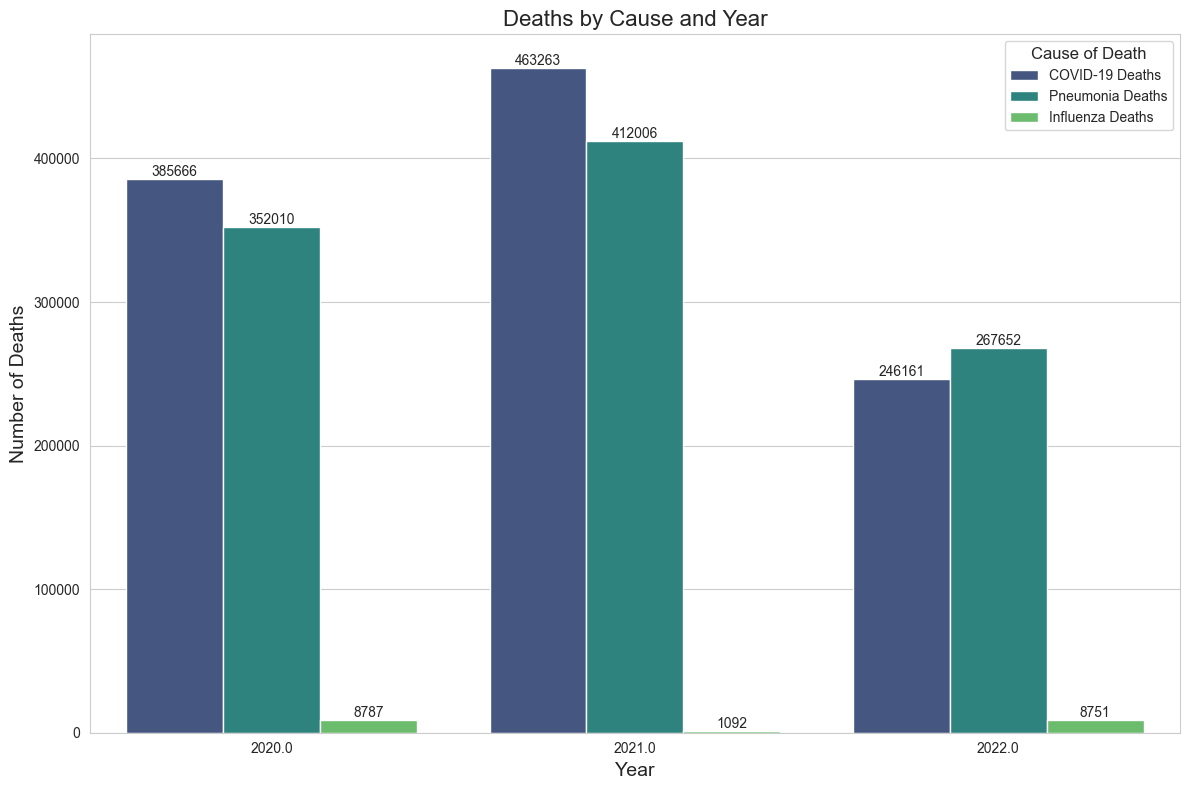

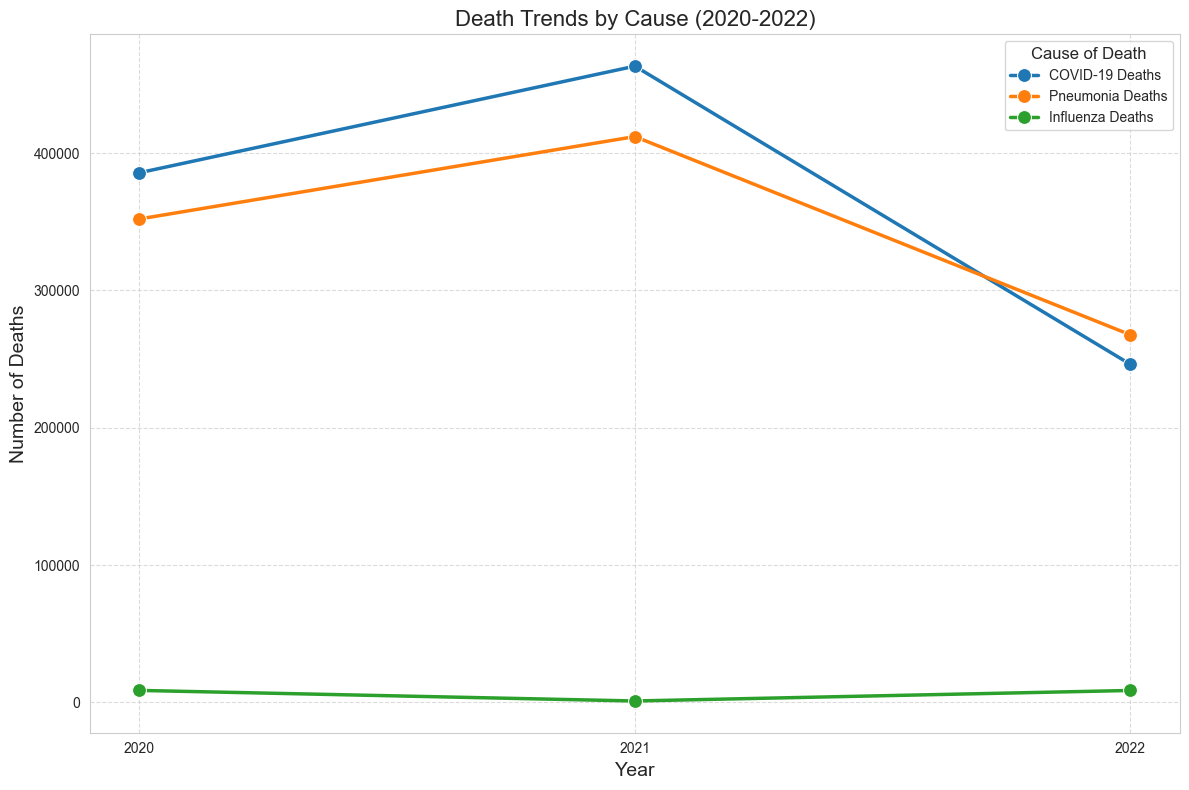

<Figure size 1200x800 with 0 Axes>

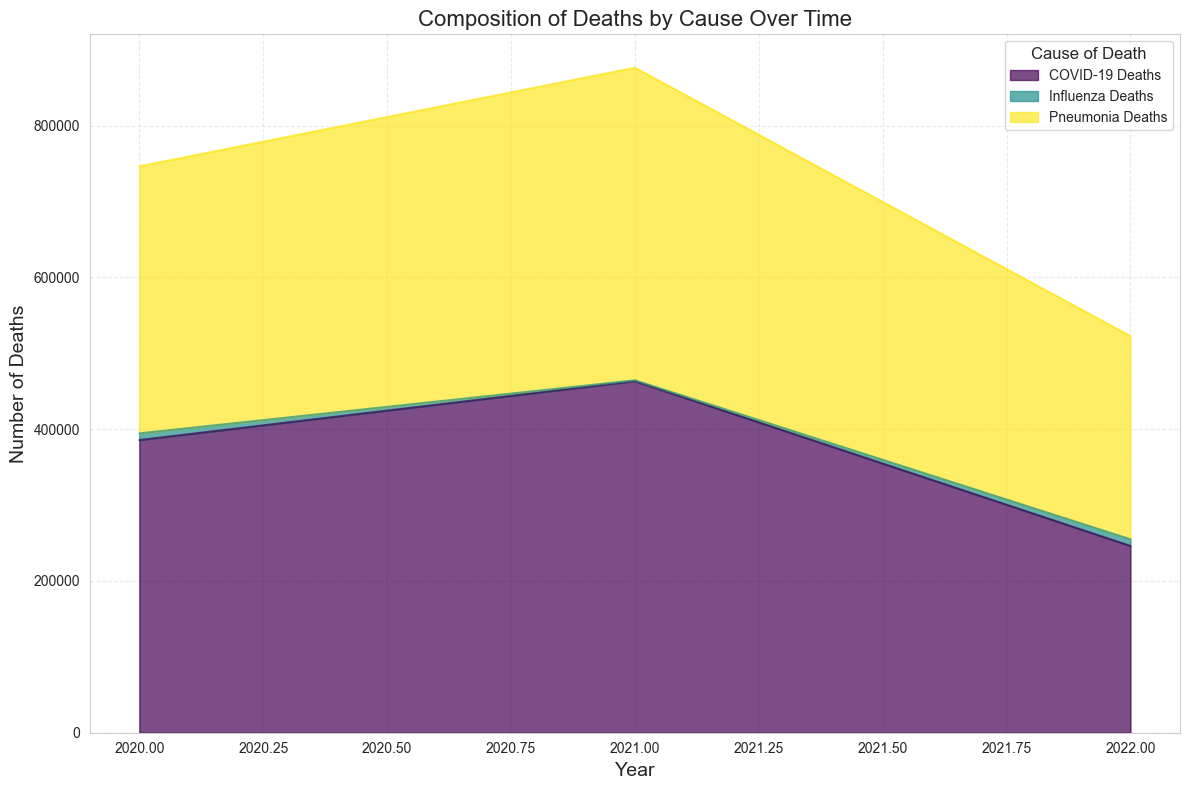

In [31]:
plot_data = pd.melt(yearly_totals, 
                    id_vars=['Year'],
                    value_vars=['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths'],
                    var_name='Cause', 
                    value_name='Deaths')

# Step 4: Create the visualization
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Bar plot
ax = sns.barplot(x='Year', y='Deaths', hue='Cause', data=plot_data, palette='viridis')

# Customize the plot
plt.title('Deaths by Cause and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend(title='Cause of Death', title_fontsize=12, fontsize=10, loc='upper right')

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 5: Create a line plot to show trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=plot_data, x='Year', y='Deaths', hue='Cause', marker='o', linewidth=2.5, markersize=10)

plt.title('Death Trends by Cause (2020-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xticks([2020, 2021, 2022])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cause of Death', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

# Step 6: Create a stacked area chart to show composition
plt.figure(figsize=(12, 8))

# Pivot the data for the area chart
area_data = plot_data.pivot(index='Year', columns='Cause', values='Deaths')
area_data.plot.area(figsize=(12, 8), alpha=0.7, stacked=True, colormap='viridis')

plt.title('Composition of Deaths by Cause Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Cause of Death', title_fontsize=12, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

ข้อมูลสำหรับการวิเคราะห์:
      Data As Of  Start Date    End Date    Group    Year  Month  \
2754  09/27/2023  01/01/2020  12/31/2020  By Year  2020.0    NaN   
2805  09/27/2023  01/01/2021  12/31/2021  By Year  2021.0    NaN   
2856  09/27/2023  01/01/2022  12/31/2022  By Year  2022.0    NaN   

              State        Sex Age Group  COVID-19 Deaths  Total Deaths  \
2754  United States  All Sexes  All Ages         385666.0     3390039.0   
2805  United States  All Sexes  All Ages         463263.0     3471767.0   
2856  United States  All Sexes  All Ages         246161.0     3288942.0   

      Pneumonia Deaths  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
2754          352010.0                       180086.0            8787.0   
2805          412006.0                       259613.0            1092.0   
2856          267652.0                       110393.0            8751.0   

      Pneumonia, Influenza, or COVID-19 Deaths Footnote  Other Disease Deaths  
2754               

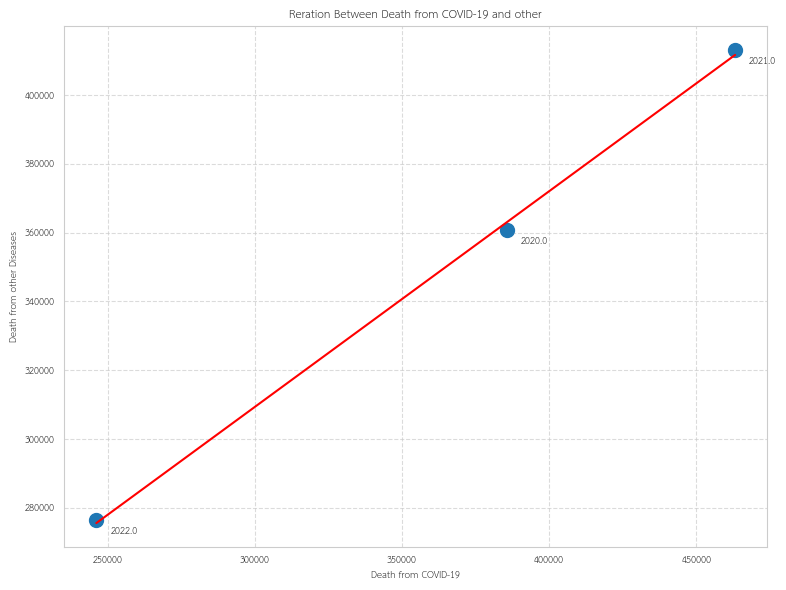

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


yearly_totals['Other Disease Deaths'] = yearly_totals['Pneumonia Deaths'] + yearly_totals['Influenza Deaths']
df = yearly_totals
# Print the data
print("ข้อมูลสำหรับการวิเคราะห์:")
print(df)

# Simple correlation test
correlation, p_value = stats.pearsonr(df['COVID-19 Deaths'], df['Other Disease Deaths'])

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nผลลัพธ์: มีความสัมพันธ์ที่มีนัยสำคัญทางสถิติระหว่างการเสียชีวิตจาก COVID-19 และการเสียชีวิตจากโรคอื่นๆ")
    if correlation < 0:
        print("ค่าสหสัมพันธ์เชิงลบแสดงให้เห็นว่าเมื่อการเสียชีวิตจาก COVID-19 เพิ่มขึ้น การเสียชีวิตจากโรคอื่นๆ มีแนวโน้มลดลง")
    else:
        print("ค่าสหสัมพันธ์เชิงบวกแสดงให้เห็นว่าเมื่อการเสียชีวิตจาก COVID-19 เพิ่มขึ้น การเสียชีวิตจากโรคอื่นๆ ก็มีแนวโน้มเพิ่มขึ้นด้วย")
else:
    print("\nผลลัพธ์: ไม่มีความสัมพันธ์ที่มีนัยสำคัญทางสถิติระหว่างการเสียชีวิตจาก COVID-19 และการเสียชีวิตจากโรคอื่นๆ")

print("\nผลการทดสอบสมมติฐาน:")
print(f"ค่าสัมประสิทธิ์สหสัมพันธ์: {correlation:.4f}")
print(f"ค่า alpha: {alpha}")
print(f"ค่า P-value: {p_value:.8f}")


# Optional: Create a simple scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['COVID-19 Deaths'], df['Other Disease Deaths'], s=100)
plt.plot(np.unique(df['COVID-19 Deaths']), 
         np.poly1d(np.polyfit(df['COVID-19 Deaths'], df['Other Disease Deaths'], 1))(np.unique(df['COVID-19 Deaths'])), 
         color='red')

# Add labels to points (years)
for i, txt in enumerate(df['Year']):
    plt.annotate(txt, (df['COVID-19 Deaths'].iloc[i], df['Other Disease Deaths'].iloc[i]), 
                 xytext=(10, -10), textcoords='offset points')
    
plt.rc('font', family='TH Sarabun New')
plt.title('Reration Between Death from COVID-19 and other')
plt.xlabel('Death from COVID-19')
plt.ylabel('Death from other Diseases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()